In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
file_path = "/content/drive/MyDrive/assigment2_1/data set cvpr.csv"  # Change to your file's location if running locally
data = pd.read_csv(file_path)
print(data.head())

     x    y    z  class
0  1.3  9.1  2.1      0
1  3.6  7.8  1.5      0
2  6.9  6.3  3.8      2
3  7.2  8.4  2.7      1
4  7.5  8.4  1.2      0


In [3]:
X = data[['x', 'y', 'z']].values  # Adjust based on column names in the dataset
y = data['class'].values  # Adjust based on the column name for the target variable

In [4]:
# Create a LabelEncoder for each categorical column
encoders = {}
for col in ['x', 'y', 'z']:  # Assuming these are the categorical columns
    encoders[col] = LabelEncoder()
    data[col] = encoders[col].fit_transform(data[col])

# Now extract the numerical features after encoding
X = data[['x', 'y', 'z']].values
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Ensure class labels start from 0
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Fit and transform on y_train
y_val = label_encoder.transform(y_val)        # Transform y_val and y_test using the fitted encoder
y_test = label_encoder.transform(y_test)

num_classes = len(np.unique(y))
y_train_one_hot = to_categorical(y_train, num_classes)
y_val_one_hot = to_categorical(y_val, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dense(8, activation='relu'),  # Second hidden layer
    Dense(num_classes, activation='softmax')  # Output layer for classification
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot),
                    epochs=50, batch_size=8, verbose=1)
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.1985 - val_accuracy: 1.0000 - val_loss: 1.0064
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.5000 - loss: 1.1876 - val_accuracy: 1.0000 - val_loss: 1.0110
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 1.1769 - val_accuracy: 1.0000 - val_loss: 1.0155
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5000 - loss: 1.1663 - val_accuracy: 1.0000 - val_loss: 1.0202
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5000 - loss: 1.1557 - val_accuracy: 1.0000 - val_loss: 1.0248
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 1.1452 - val_accuracy: 1.0000 - val_loss: 1.0295
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5000 - loss: 1.1348 - val_accuracy: 0.0000e+00 - val_loss: 1.0342
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 1.1245 - val_accuracy: 0.0000e+00 - val_loss:

Test Loss: 1.1244, Test Accuracy: 0.5000


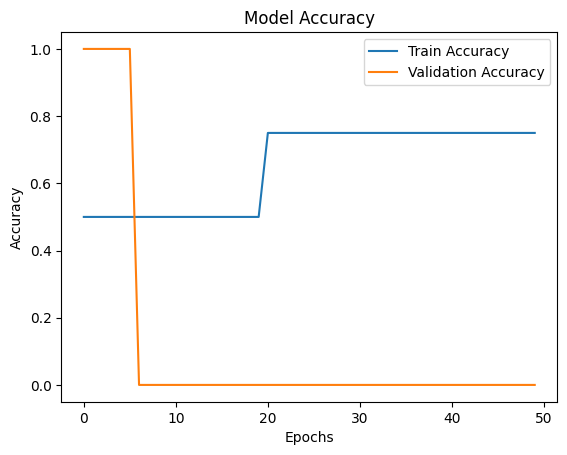

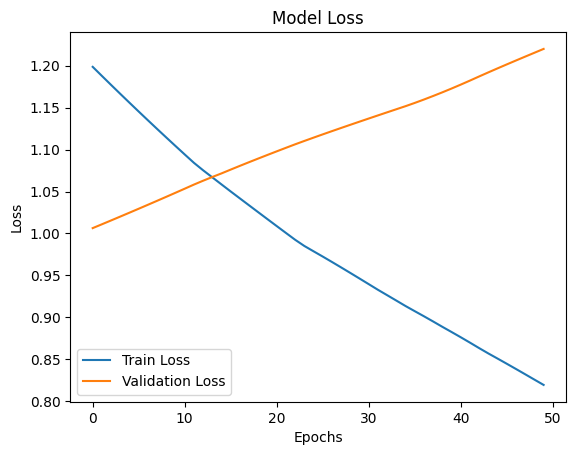

In [6]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)

# Print evaluation results
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()